# Use xraydb python database to estimate absorption coefficient
## using the code below compare absortion coefficient value of Fe at 20keV and 60keV

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xraydb

# material and energy definition : energy is in eV
Material='Fe'
Energy=20000  # in eV

# compute mu value with xraydb in cm-1
muFe20=xraydb.material_mu(Material,Energy)
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
print('mu (cm-1) = ', muFe20)

# material and energy definition : energy is in eV
Material='Fe'
Energy=60000  # in eV

# compute mu value with xraydb in cm-1
muFe60=xraydb.material_mu(Material,Energy)
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
print('mu (cm-1) = ', muFe60)

Material  Fe
Energy in keV =  20.0
mu (cm-1) =  202.3822222844012
Material  Fe
Energy in keV =  60.0
mu (cm-1) =  9.494880224078575


# Use xraydb python database to estimate transmission for a fixed energy
## Compute transmission for a specific thickness using Beer Lambert Law for Fe at 20keV and 60keV. Knowing that tomography requires at least 0.2 transmission which energy is best to use between 20keV and 60 keV

In [12]:
# material and energy definition : energy is in eV
Material='Fe'
Energy=20000  # in eV

# compute mu value with xraydb in cm-1
muFe20=xraydb.material_mu(Material,Energy)

# thickness
t=0.1 # in cm

#compute transmission using Beer Lambert law
transmission=np.exp(-muFe20*t)
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
info ='transmission for (%f cm) = %e' %(t,transmission)
print(info)


# material and energy definition : energy is in eV
Material='Fe'
Energy=60000  # in eV

# compute mu value with xraydb in cm-1
muFe20=xraydb.material_mu(Material,Energy)

# thickness
t=0.1 # in cm

#compute transmission using Beer Lambert law
transmission=np.exp(-muFe20*t)
print('Material ', Material)
print('Energy in keV = ',Energy/1000)
info ='transmission for (%f cm) = %e' %(t,transmission)
print(info)

Material  Fe
Energy in keV =  20.0
transmission for (0.100000 cm) = 1.624246e-09
Material  Fe
Energy in keV =  60.0
transmission for (0.100000 cm) = 3.869391e-01


# Use xraydb python database to estimate transmission for an energy range
## What minimum energy is required for a transmission of 0.2 in the case of Fe with 0.1 cm trhickness

Text(0.5, 1.0, 'Material = Fe / thickness = 0.1000 cm')

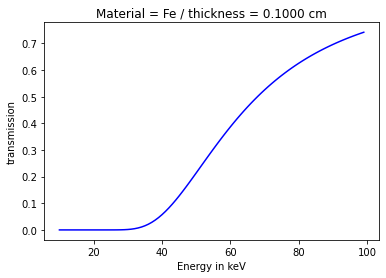

In [13]:
plt.close('all')

# Material information
Material='Fe'
thickness=0.1 # in cm

# Energy range 10keV to 100keV
Emin=10000.0
Emax=100000.0
Estep = 1000.0
Energy_range=np.arange (Emin,Emax,Estep)

# compute transmission for a specific thickness using Beer Lambert Law for various energies
mu=np.zeros(len(Energy_range))
trans=np.zeros(len(Energy_range))
cpt=0
for Energy_val in Energy_range:
    # compute absorption value with xraydb
    mu[cpt]=xraydb.material_mu(Material,Energy_val)
    # compute transmission using Beer Lambert law
    trans[cpt]=np.exp(-mu[cpt]*thickness)
    cpt=cpt+1

# plot transmission coefficient vs energy
plt.figure(1)

plt.plot(Energy_range/1000,trans,'b-')   
plt.xlabel('Energy in keV')
plt.ylabel('transmission')
title='Material = %s / thickness = %0.4f cm' %(Material,t)
plt.title(title)


# Use xraydb python database to estimate transmission for a fixed energy and varying thickness (from 0.1 to 10 cm)
## 

(0.01, 1)

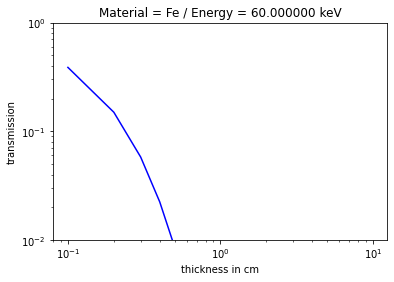

In [14]:
plt.close('all')

# Material information
Material='Fe'

# thickness range 0.1 to 10 cm
tmin=0.1
tmax=10.
tstep = 0.1
t_range=np.arange (tmin,tmax,tstep)

#Energy fied to 60 keV
Energy=60000.

# compute absorption coefficient for a fixed energy
mu=xraydb.material_mu(Material,Energy)

# compute transmission for a specific energy using Beer Lambert Law for various thicknesses
trans=np.exp(-mu*t_range)

# plot transmission coefficient vs energy
plt.figure(1)

plt.loglog(t_range,trans,'b-')   
plt.xlabel('thickness in cm')
plt.ylabel('transmission')
title='Material = %s / Energy = %f keV' %(Material,Energy/1000)
plt.title(title)
plt.ylim(0.01,1)


# Use xraydb python database to find the best energy to image a rod of 0.15 cm of Iron with a transmission of at least 0.2


In [15]:
plt.close('all')

# Material information
Material='Fe'
thickness=0.15 # in cm

# Energy range 10keV to 100keV
Emin=10000.0
Emax=100000.0
Estep = 100.0
Energy_range=np.arange (Emin,Emax,Estep)

#tranmission requirements
transmission= 0.2

# compute transmission for a specific thickness using Beer Lambert Law for various energies
mu=np.zeros(len(Energy_range))
trans=np.zeros(len(Energy_range))
cpt=0
for Energy_val in Energy_range:
    # compute absorption value with xraydb
    mu[cpt]=xraydb.material_mu(Material,Energy_val)
    # compute transmission using Beer Lambert law
    trans[cpt]=np.exp(-mu[cpt]*thickness)
    if trans[cpt]>transmission:
        print('Material ', Material)
        info ='transmission for (%f cm) = %0.4f' %(thickness,trans[cpt])       
        print(info)
        print('Minimum required Energy in keV = ',Energy_val/1000)
        break
    cpt=cpt+1



Material  Fe
transmission for (0.150000 cm) = 0.2006
Minimum required Energy in keV =  57.3


# Plot the contrast between Al and Cu as a function of energy : assume Al thickness is 1mm and Cu thickness is 50µm

Text(0, 0.5, 'transmission Al Cu')

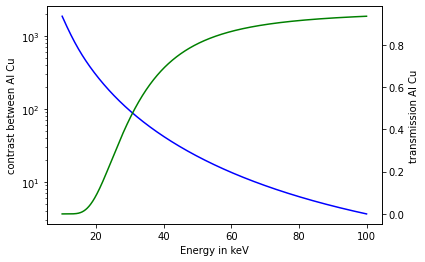

In [22]:
plt.close('all')

# Material information
Material1='Al'
thickness1=0.1 # in cm
Material2='Cu'
thickness2=0.005 # in cm

# Energy range 10keV to 100keV
Emin=10000.0
Emax=100000.0
Estep = 100.0
Energy_range=np.arange (Emin,Emax,Estep)

# compute transmission for a specific thickness using Beer Lambert Law for various energies
mu1=np.zeros(len(Energy_range))
mu2=np.zeros(len(Energy_range))
trans=np.zeros(len(Energy_range))
cpt=0
for Energy_val in Energy_range:
    # compute absorption value with xraydb
    mu1[cpt]=xraydb.material_mu(Material1,Energy_val)
    mu2[cpt]=xraydb.material_mu(Material2,Energy_val)
    # compute transmission using Beer Lambert law
    trans[cpt]=np.exp(-mu1[cpt]*thickness1)*np.exp(-mu2[cpt]*thickness2)
    cpt=cpt+1

fig,ax1=plt.subplots()
ax2=ax1.twinx()

ax1.semilogy(Energy_range/1000,mu2-mu1,'b-')   
ax1.set_xlabel('Energy in keV')
ax1.set_ylabel('contrast between Al Cu')

ax2.plot(Energy_range/1000,trans,'g-')   
ax2.set_ylabel('transmission Al Cu')